In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [76]:
ds = xr.open_dataset('E:\Proyecto de Grado\Data\corrientes_u_v_5m_enero1993_diciembre2020.nc')
data_oni = pd.read_csv('E:\Proyecto de Grado\Data\ONI_NOAA - copia.txt', sep="\s+")


In [77]:
V = ds["vo"].mean(dim=["depth"])
U = ds["uo"].mean(dim=["depth"])
date = ds["time"].to_numpy()
velocity = np.sqrt(U**2 + V**2)

In [78]:
date = pd.to_datetime(date)

In [79]:
P1 = velocity.sel(latitude = 17.25 , longitude = -74, method="nearest").to_numpy()
P2 = velocity.sel(latitude = 13 , longitude = -73, method="nearest").to_numpy()
P3 = velocity.sel(latitude = 10 , longitude = -77, method="nearest").to_numpy()
P4 = velocity.sel(latitude = 14 , longitude = -80, method="nearest").to_numpy()

In [80]:
anomalia = data_oni["ANOM"]

In [81]:
anom_df = pd.DataFrame(data_oni["ANOM"].values, columns=["Anomalia ONI"], index=date)

In [82]:
points_df = pd.DataFrame(list(zip(P1, P2, P3, P4)), columns=["Nodo 1", "Nodo 2", "Nodo 3", "Nodo 4"], index = date)

In [83]:
point_t_df = pd.DataFrame(list(zip(P1, P2, P3, P4, data_oni["YR"])), columns=["Nodo 1", "Nodo 2", "Nodo 3", "Nodo 4", "Años"], index = date)

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

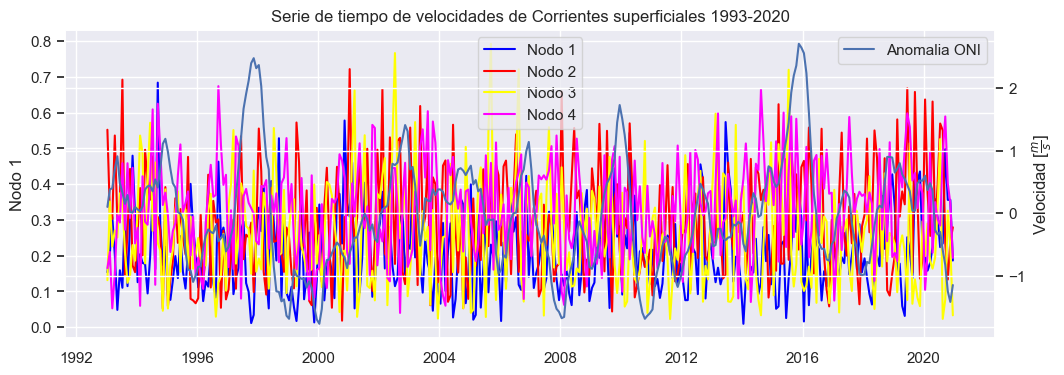

In [84]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")
sns.lineplot(data = points_df["Nodo 1"], color= "blue", label="Nodo 1") # agregar label
sns.lineplot(data = points_df["Nodo 2"], color= "red", label="Nodo 2") # agregar label
sns.lineplot(data = points_df["Nodo 3"], color= "yellow", label="Nodo 3") # agregar label
sns.lineplot(data = points_df["Nodo 4"], color= "magenta", label="Nodo 4") # agregar label
ax2 = plt.twinx()
sns.lineplot(data = anom_df, color= "black")
#sns.regplot(data = anom_df["Anomalia ONI"], x= "Años", y = r"Velocidad [$\frac{m}{s}$]", color="magenta")
plt.xlabel("Año")
plt.ylabel(r"Velocidad [$\frac{m}{s}$]")
plt.title("Serie de tiempo de velocidades de Corrientes superficiales 1993-2020")
plt.legend()

<h2>Visualización de componentes</h2>

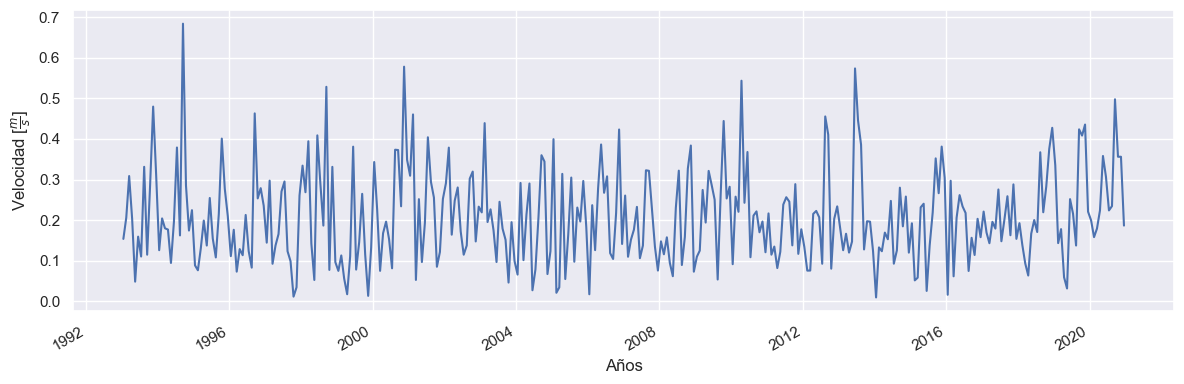

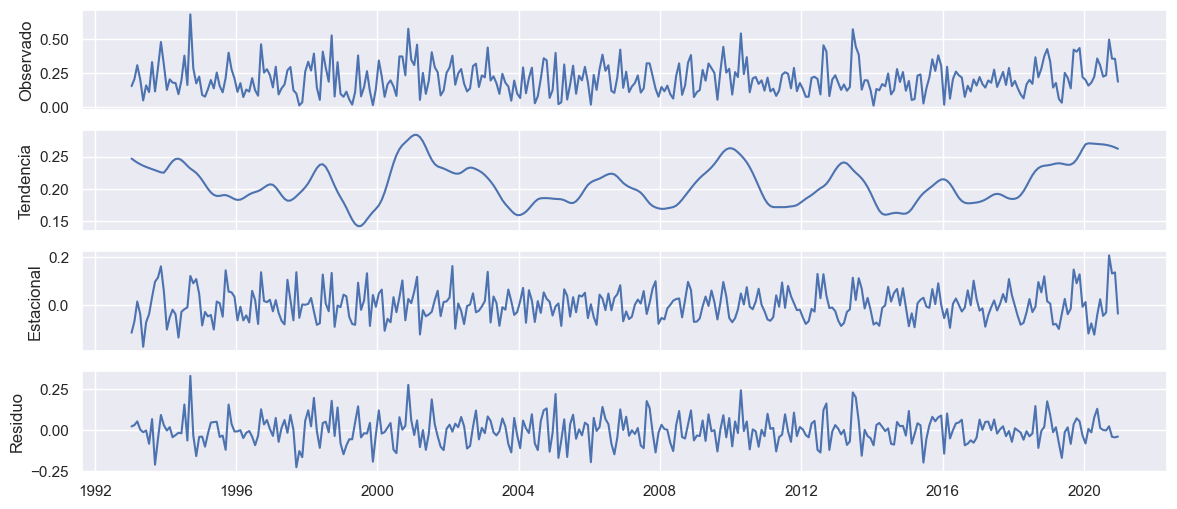

In [85]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_style("darkgrid")
ax.plot(date, points_df["Nodo 1"])
ax.set_xlabel('Años')
ax.set_ylabel(r"Velocidad [$\frac{m}{s}$]")

fig.autofmt_xdate()
plt.tight_layout()

decomp_p1 = STL(points_df["Nodo 1"], period = 12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize = (14,6))

ax1.plot(decomp_p1.observed)
ax1.set_ylabel('Observado')
ax2.plot(decomp_p1.trend)
ax2.set_ylabel('Tendencia')
ax3.plot(decomp_p1.seasonal)
ax3.set_ylabel('Estacional')
ax4.plot(decomp_p1.resid)
ax4.set_ylabel('Residuo')
plt.show()

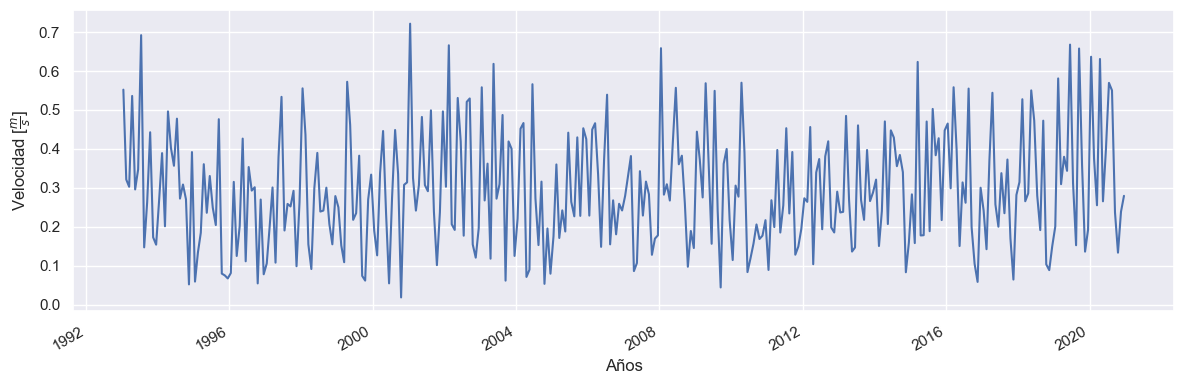

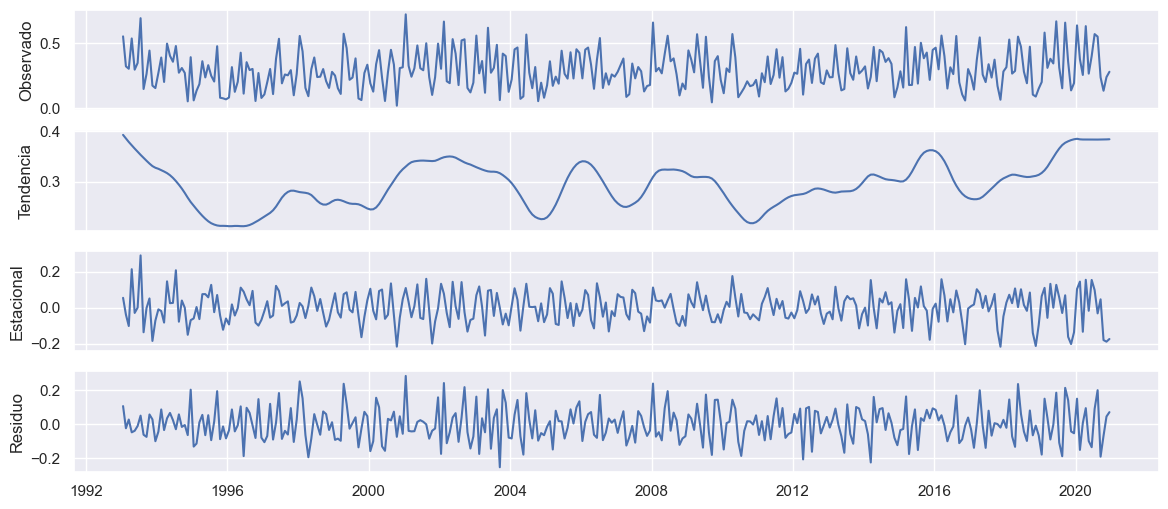

In [86]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_style("darkgrid")
ax.plot(date, points_df["Nodo 2"])
ax.set_xlabel('Años')
ax.set_ylabel(r"Velocidad [$\frac{m}{s}$]")

fig.autofmt_xdate()
plt.tight_layout()

decomp_p2 = STL(points_df["Nodo 2"], period = 12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize = (14,6))

ax1.plot(decomp_p2.observed)
ax1.set_ylabel('Observado')
ax2.plot(decomp_p2.trend)
ax2.set_ylabel('Tendencia')
ax3.plot(decomp_p2.seasonal)
ax3.set_ylabel('Estacional')
ax4.plot(decomp_p2.resid)
ax4.set_ylabel('Residuo')
plt.show()

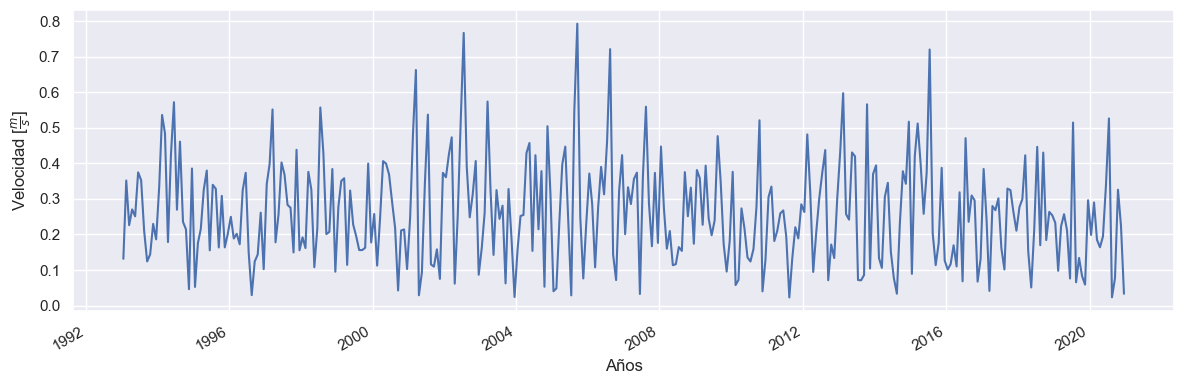

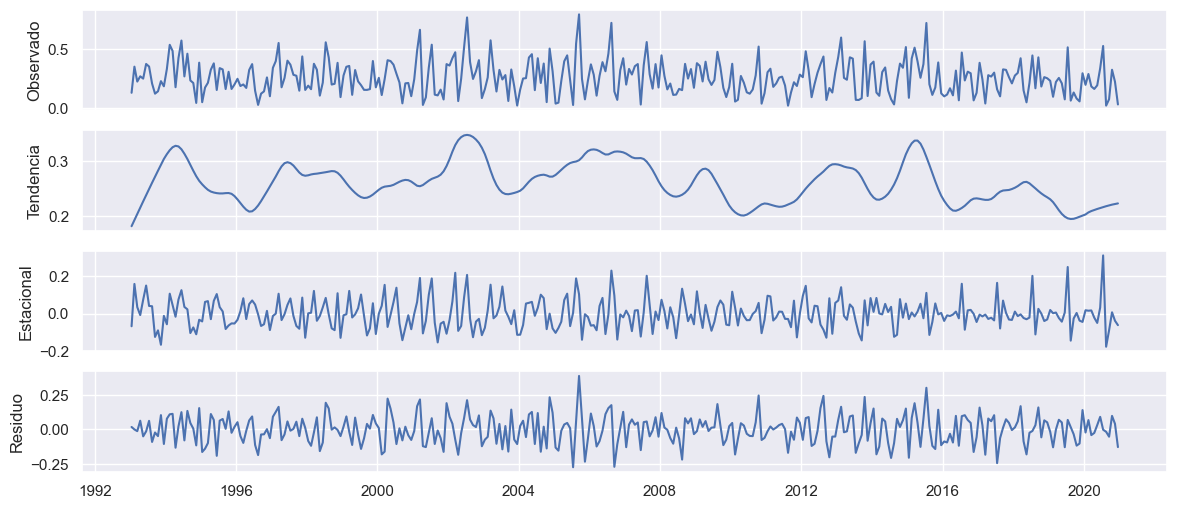

In [87]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_style("darkgrid")
ax.plot(date, points_df["Nodo 3"])
ax.set_xlabel('Años')
ax.set_ylabel(r"Velocidad [$\frac{m}{s}$]")

fig.autofmt_xdate()
plt.tight_layout()

decomp_p3 = STL(points_df["Nodo 3"], period = 12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize = (14,6))

ax1.plot(decomp_p3.observed)
ax1.set_ylabel('Observado')
ax2.plot(decomp_p3.trend)
ax2.set_ylabel('Tendencia')
ax3.plot(decomp_p3.seasonal)
ax3.set_ylabel('Estacional')
ax4.plot(decomp_p3.resid)
ax4.set_ylabel('Residuo')
plt.show()

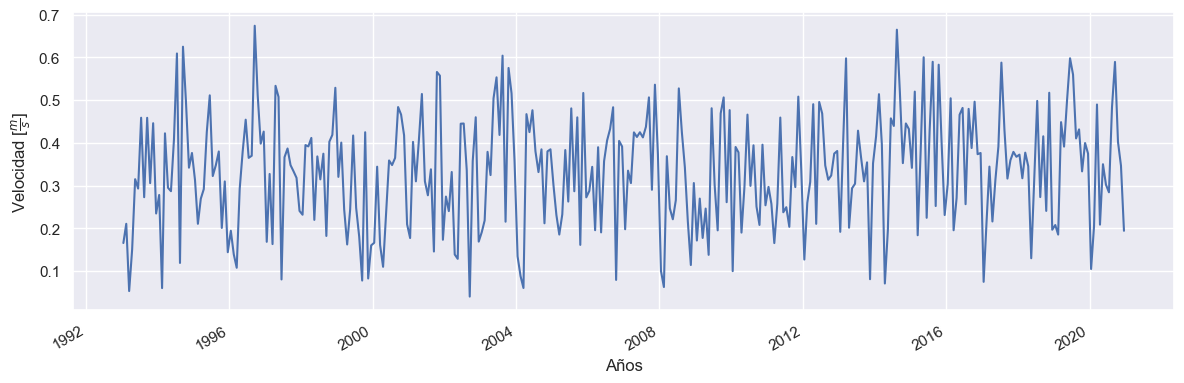

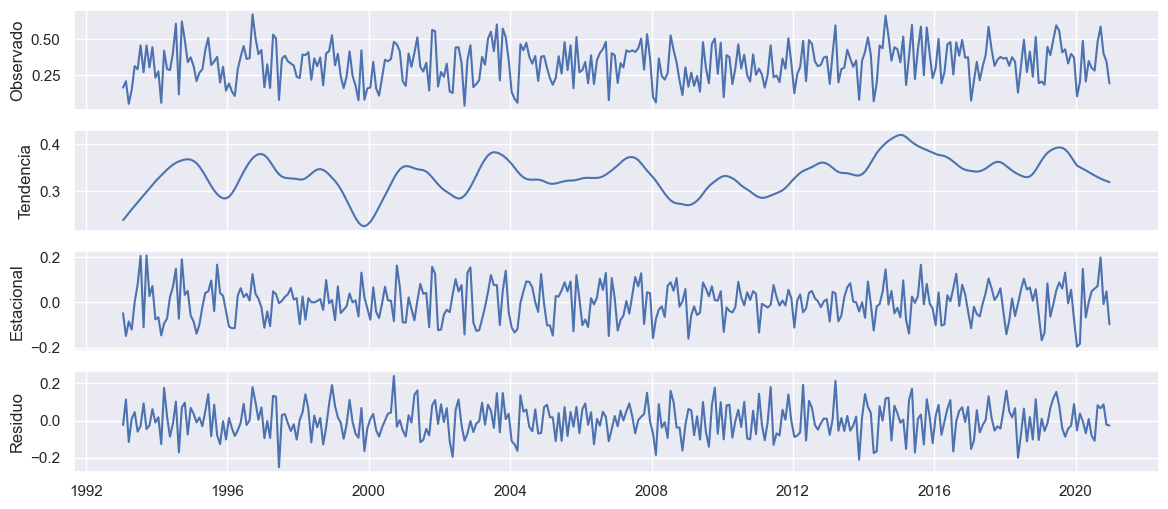

In [88]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_style("darkgrid")
ax.plot(date, points_df["Nodo 4"])
ax.set_xlabel('Años')
ax.set_ylabel(r"Velocidad [$\frac{m}{s}$]")

fig.autofmt_xdate()
plt.tight_layout()

decomp_p4 = STL(points_df["Nodo 4"], period = 12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize = (14,6))

ax1.plot(decomp_p4.observed)
ax1.set_ylabel('Observado')
ax2.plot(decomp_p4.trend)
ax2.set_ylabel('Tendencia')
ax3.plot(decomp_p4.seasonal)
ax3.set_ylabel('Estacional')
ax4.plot(decomp_p4.resid)
ax4.set_ylabel('Residuo')
plt.show()

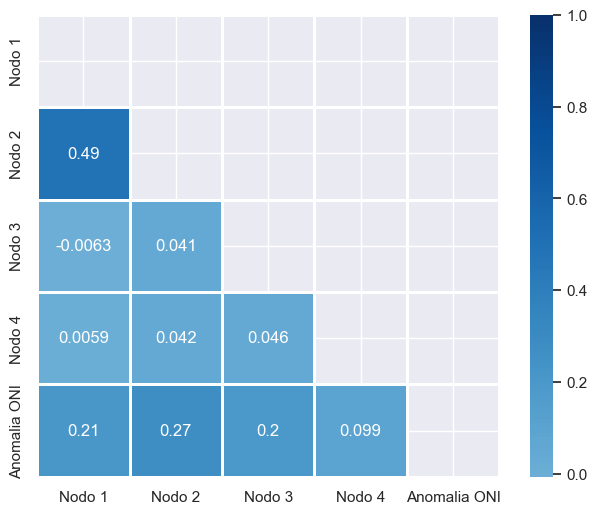

In [89]:
puntos_df = pd.DataFrame(list(zip(P1, P2, P3, P4, anomalia)), columns=["Nodo 1", "Nodo 2", "Nodo 3", "Nodo 4", "Anomalia ONI"], index = date)
puntos_t_df = pd.DataFrame(list(zip(P1, P2, P3, P4, anomalia, data_oni["YR"])), columns=["Nodo 1", "Nodo 2", "Nodo 3", "Nodo 4", "Anomalia ONI", "Años"], index = date)
puntos_df["Nodo 1"] = puntos_df["Nodo 1"].values - decomp_p1.seasonal - decomp_p1.resid
puntos_df["Nodo 2"] = puntos_df["Nodo 2"].values - decomp_p2.seasonal - decomp_p2.resid
puntos_df["Nodo 3"] = puntos_df["Nodo 3"].values - decomp_p3.seasonal - decomp_p3.resid
puntos_df["Nodo 4"] = puntos_df["Nodo 4"].values - decomp_p3.seasonal - decomp_p4.resid

corr_df = puntos_df.corr(method="pearson")
mask = np.triu(np.ones_like(corr_df, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df, mask= mask, cmap= "Blues", vmax=1, center = 0,
            square = True, linewidths= 1 ,annot=True)
plt.show()

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

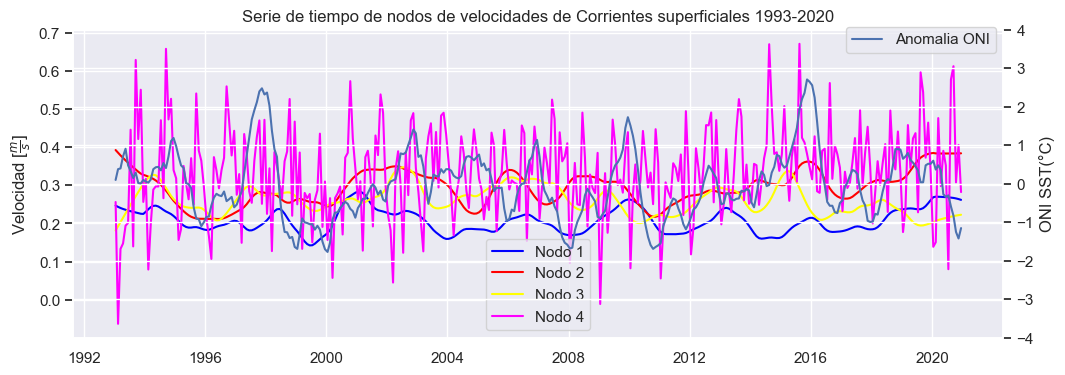

In [90]:
plt.figure(figsize=(12, 4))
sns.set_style("darkgrid")
ax = sns.lineplot(data = puntos_df["Nodo 1"], color= "blue", label="Nodo 1") # agregar label
sns.lineplot(data = puntos_df["Nodo 2"], color= "red", label="Nodo 2") # agregar label
sns.lineplot(data = puntos_df["Nodo 3"], color= "yellow", label="Nodo 3") # agregar label
sns.lineplot(data = puntos_df["Nodo 4"], color= "magenta", label="Nodo 4") # agregar label
ax2 = plt.twinx()
color = sns.color_palette("Greys", 8)
sns.lineplot(data = anom_df, color= "#0a2e36")
#sns.regplot(data = anom_df["Anomalia ONI"], x= "Años", y = r"Velocidad [$\frac{m}{s}$]", color="magenta")
#plt.xlabel("Año")
#plt.ylabel(r"Velocidad [$\frac{m}{s}$]")
plt.title("Serie de tiempo de nodos de velocidades de Corrientes superficiales 1993-2020")
# poner la primera leyenda arriba a la derecha con dos columnas
plt.legend(bbox_to_anchor=(1, 0), loc='upper right', ncol=2)
# crear una segunda leyenda para el eje derecho
ax2.legend([ax2.get_lines()[0]], ["Anomalia ONI"], bbox_to_anchor=(1, 0.9), loc='lower right')
# establecer la escala del eje izquierdo de 0 a 1
plt.ylim(0, 1)
# establecer la escala del eje derecho de -4 a 4
ax2.set_ylim(-4, 4)

ax.set_ylabel(r"Velocidad [$\frac{m}{s}$]") # poner el título al eje izquierdo
ax2.set_ylabel("ONI SST(°C)") # poner el título al eje derecho
plt.show()

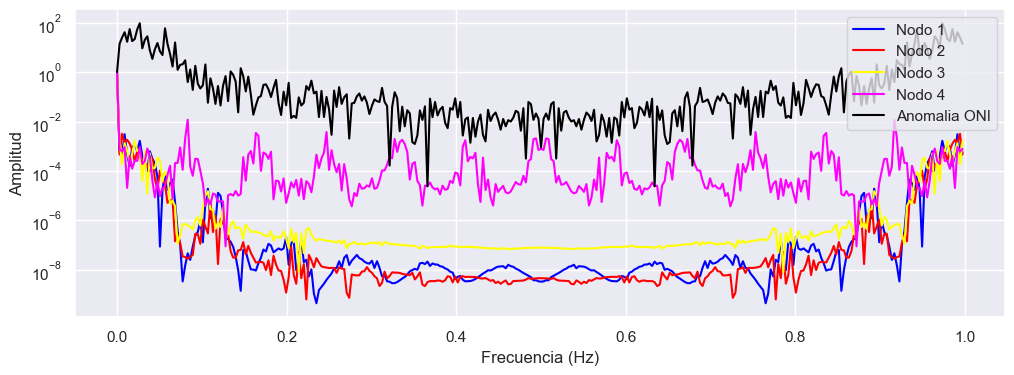

In [91]:
#Transformada rapida de Fourier
f1 = np.fft.fft(puntos_df["Nodo 1"])

# get the list of frequencies
num1=np.size(puntos_df["Nodo 1"].index)
freq1 = [i / num1 for i in list(range(num1))]

# get the list of spectrums
spectrum1=f1.real*f1.real+f1.imag*f1.imag
nspectrum1=spectrum1/spectrum1[0]

############
f2 = np.fft.fft(puntos_df["Nodo 2"])

# get the list of frequencies
num2=np.size(puntos_df["Nodo 2"].index)
freq2 = [i / num2 for i in list(range(num2))]

# get the list of spectrums
spectrum2=f2.real*f2.real+f2.imag*f2.imag
nspectrum2=spectrum2/spectrum2[0]

############
f3 = np.fft.fft(puntos_df["Nodo 3"])

# get the list of frequencies
num3=np.size(puntos_df["Nodo 3"].index)
freq3 = [i / num3 for i in list(range(num3))]

# get the list of spectrums
spectrum3=f3.real*f3.real+f3.imag*f3.imag
nspectrum3=spectrum3/spectrum3[0]

############
f4 = np.fft.fft(puntos_df["Nodo 4"])

# get the list of frequencies
num4=np.size(puntos_df["Nodo 4"].index)
freq4 = [i / num4 for i in list(range(num4))]

# get the list of spectrums
spectrum4=f4.real*f4.real+f4.imag*f4.imag
nspectrum4=spectrum4/spectrum4[0]

############
f5 = np.fft.fft(puntos_df["Anomalia ONI"])

# get the list of frequencies
num5=np.size(puntos_df["Anomalia ONI"].index)
freq5 = [i / num1 for i in list(range(num5))]

# get the list of spectrums
spectrum5=f5.real*f5.real+f5.imag*f5.imag
nspectrum5=spectrum5/spectrum5[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_style("darkgrid")
ax.set_xlabel('Frecuencia (Hz)')
ax.set_ylabel("Amplitud")

plt.semilogy(freq1,nspectrum1, color= "blue", label="Nodo 1") # agregar label
plt.semilogy(freq2,nspectrum2, color= "red", label="Nodo 2") # agregar label
plt.semilogy(freq3,nspectrum3, color= "yellow", label="Nodo 3") # agregar label
plt.semilogy(freq4,nspectrum4, color= "magenta", label="Nodo 4") # agregar label
plt.semilogy(freq5,nspectrum5, color= "black", label="Anomalia ONI") # agregar label
plt.legend(loc = "upper right") # mostrar la leyenda

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

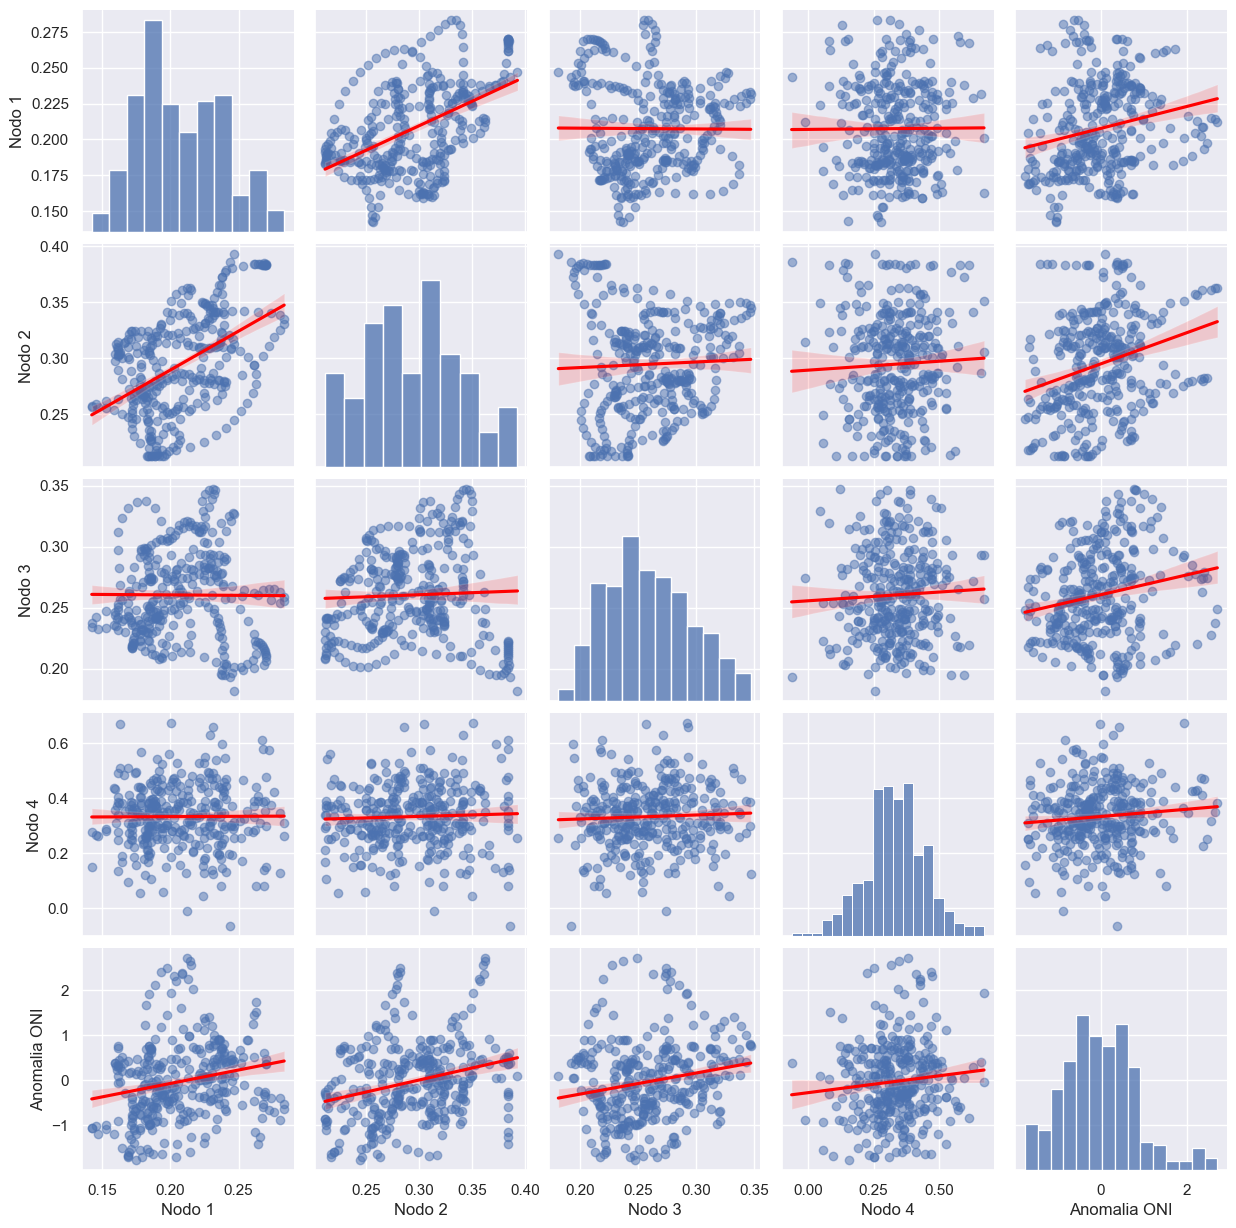

In [92]:
sns.pairplot(puntos_df, kind = 'reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

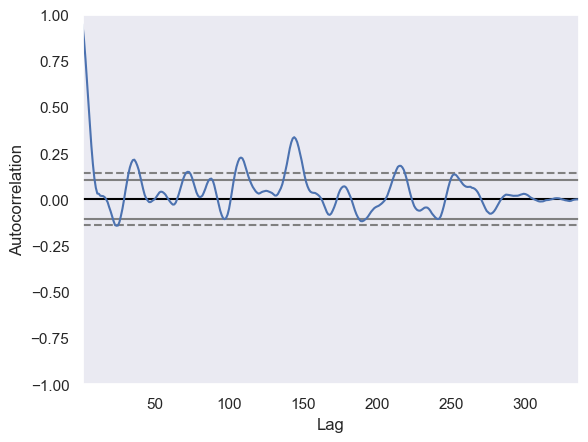

In [93]:
autocorrelation_plot(puntos_df)
plt.show()

In [94]:
df_log = np.log(puntos_df + 1)
#df_log["Anomalia ONI"] = puntos_df["Anomalia ONI"]


c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


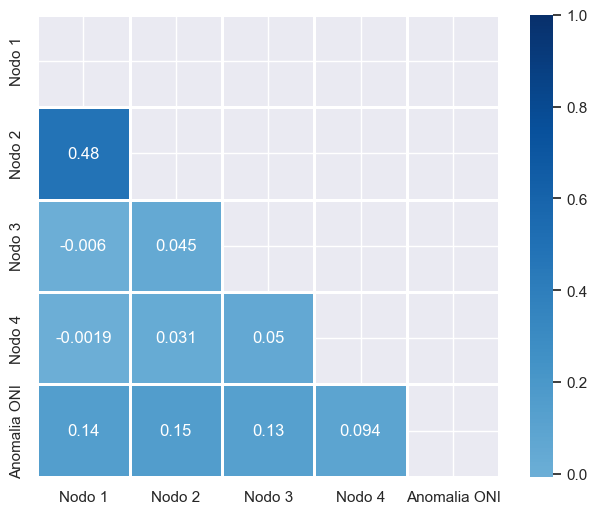

In [95]:
corr_df = df_log.corr(method="pearson")

mask = np.triu(np.ones_like(corr_df, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df, mask= mask, cmap= "Blues", vmax=1, center = 0,
            square = True, linewidths= 1 ,annot=True)
plt.show()

In [96]:
"""for i in point_t_df.columns:    
    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(14,7))
    ax.set_xlabel(r"Velocidad [$\frac{m}{s}$]")
    sns.kdeplot(data = point_t_df, fill= True, x = i , hue= "Años", alpha = 0.5, linewidth= 0, palette= 'viridis')
    plt.show()"""

'for i in point_t_df.columns:    \n    sns.set_style("white")\n    fig, ax = plt.subplots(figsize=(14,7))\n    ax.set_xlabel(r"Velocidad [$\x0crac{m}{s}$]")\n    sns.kdeplot(data = point_t_df, fill= True, x = i , hue= "Años", alpha = 0.5, linewidth= 0, palette= \'viridis\')\n    plt.show()'

In [97]:
"""from pandas.plotting import lag_plot
for i in puntos_df.columns:    
    print(i)
    lag_plot(puntos_df[i])
    plt.show()"""

'from pandas.plotting import lag_plot\nfor i in puntos_df.columns:    \n    print(i)\n    lag_plot(puntos_df[i])\n    plt.show()'